In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

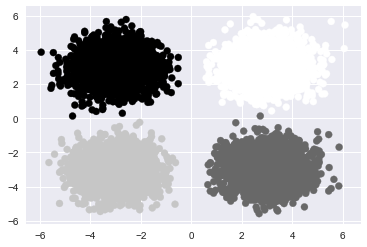

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3], [-3, 3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples = 10000,
    centers = centers,
    cluster_std = 0.8,
    n_features = 6,
    random_state = 100)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=42)

*********************
### K-Means
*******************

In [7]:
X_norm = pd.DataFrame(X_norm)
X_norm

,0,1
0,-0.646899,-0.762576
1,0.741991,-0.670410
2,0.376567,0.926389
3,0.707661,-0.706552
4,-0.666728,0.745301
5,0.742861,0.669446
6,-0.820675,-0.571395
7,-0.821401,-0.570351
8,0.687725,0.725971
9,-0.549306,0.835621


    try different normalize method, the graph SHOULD NOT look like a circle

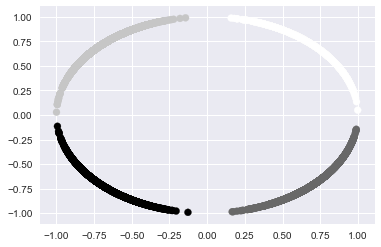

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0      2500     0     1     0
1         0     0     0  2500
2         0     0  2499     0
3         0  2500     0     0


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# normalize data 
X_norm = normalize(X)

# calculate predicted values
y_pred = KMeans(n_clusters = 4, random_state = 100).fit_predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c = y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))


In [15]:
from sklearn.cluster import MiniBatchKMeans

minibatchkmeans = MiniBatchKMeans(
    init = 'random',
    n_clusters = 4,
    batch_size = 250)
minibatchkmeans.fit(X_norm)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_norm)

# Check the solution against the data.
print('Comparing mini batch k-means clusters against the data:')
print(pd.crosstab(predict_mini, y))

# Check the MiniBatch model against our earlier one.
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing mini batch k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0      2500     0     1     0
1         0     0  2499     0
2         0     0     0  2500
3         0  2500     0     0

Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3
row_0                        
0      2501     0     0     0
1         0     0  2499     0
2         0  2500     0     0
3         0     0     0  2500


*********************
### Mean-Shifts
*******************

Number of Clusters: 4


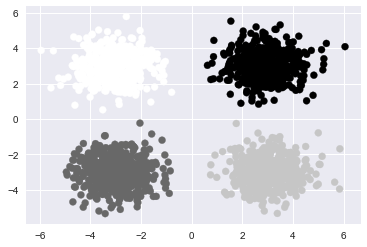

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0    0  496
1        0    0  494    0
2        0  495    0    0
3      515    0    0    0


In [95]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# set bandwidth
bandwidth = estimate_bandwidth(X_train, quantile = 0.2, n_samples = 1000)

# declare model
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True).fit(X_train)

# extract cluster assignments, coordinate of cluster center, and count clusters
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

print('Number of Clusters: {}'.format(n_clusters))

plt.scatter(X_train[:, 0], X_train[:, 1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [96]:
print(len(labels))
print(len(X_train))
print(len(X_test))

2000
2000
8000


    what to do with test set?
    since labels and X_test have different dimensions
    
    Solution: train a separate model for test sets
        (normally in clustering, there is no training and test set)

*********************
### Spectral Clustering
*******************

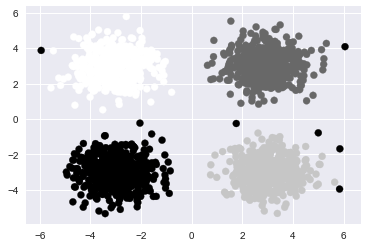

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  495    1
1        0    0    0  494
2        0  491    0    4
3      514    0    0    1


In [97]:
from sklearn.cluster import SpectralClustering

# set clusters to be 4
n_clusters = 4

# declare and fit model
sc = SpectralClustering(n_clusters = n_clusters).fit(X_train)

# predicted clusters
predict = sc.fit_predict(X_train)

#graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

*********************
### Affinity Propagation
*******************

In [17]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# declare and fit model
af = AffinityPropagation(damping = 0.6).fit(X_train)

# pull the number of clusters and cluster assignments
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters))

Estimated number of clusters: 252


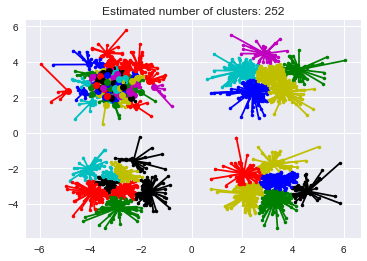

In [18]:
from itertools import cycle

plt.figure(1)   # store figure
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()